# SCGNN Train - Trafik - PCA

In [1]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
import torch
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [3]:
DATASET_PATH = config.DATA_INTERIM
df = pd.read_parquet(DATASET_PATH / "data.parquet")
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/100  Train Loss: 3065248.8750  Val Loss: 2527627.2500  Val MSE: 1469.5507  Val R2: 0.7300
Epoch 2/100  Train Loss: 2879479.7500  Val Loss: 2507777.0000  Val MSE: 1458.0099  Val R2: 0.7322
Epoch 3/100  Train Loss: 3011959.2500  Val Loss: 2485111.7500  Val MSE: 1444.8324  Val R2: 0.7346
Epoch 4/100  Train Loss: 2854939.1250  Val Loss: 2459159.5000  Val MSE: 1429.7439  Val R2: 0.7374
Epoch 5/100  Train Loss: 2898247.1250  Val Loss: 2429930.5000  Val MSE: 1412.7503  Val R2: 0.7405
Epoch 6/100  Train Loss: 2868655.5000  Val Loss: 2397407.0000  Val MSE: 1393.8413  Val R2: 0.7440
Epoch 7/100  Train Loss: 2736271.2500  Val Loss: 2361712.2500  Val MSE: 1373.0885  Val R2: 0.7478
Epoch 8/100  Train Loss: 2699066.8750  Val Loss: 2323082.7500  Val MSE: 1350.6294  Val R2: 0.7519
Epoch 9/100  Train Loss: 2689050.8750  Val Loss: 2281449.5000  Val MSE: 1326.4242  Val R2: 0.7563
Epoch 10/100  Train Loss: 2684014.2500  Val Loss: 2236709.5000  Val MSE: 1300.4124  Val R2: 0.7611
Epoch 11/100  Train

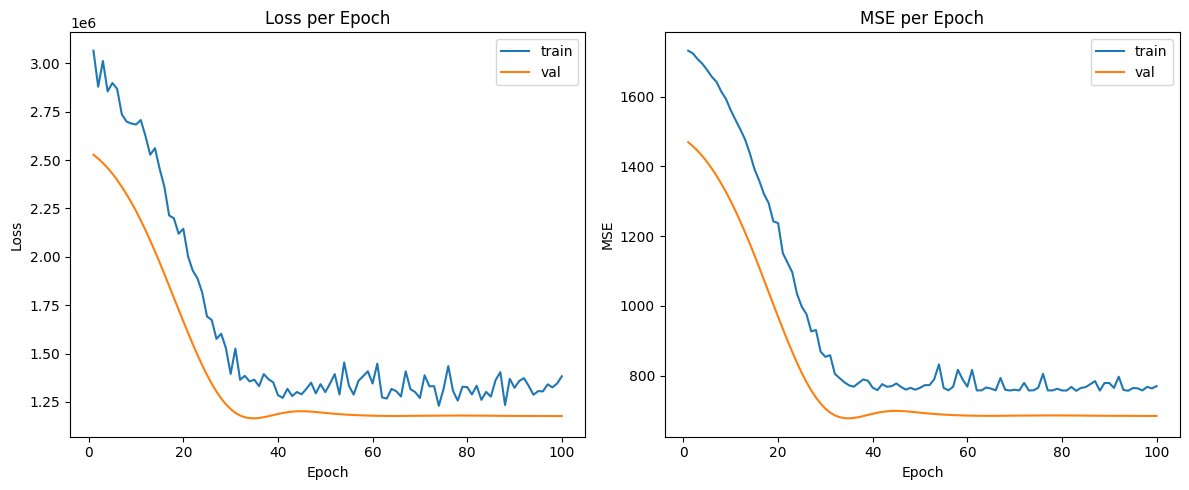

== Final Metrics ==
mse: 684.4050342166447
mae: 17.314651451212846
r2: 0.8742760029482579


In [4]:
PCA_COMPONENTS = 5
dataset = TrafficDataset(data_array, X_STEP, Y_STEP, pca_components=PCA_COMPONENTS)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=50, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=50)
sensors = dataset.sensors
edges = []
for i in range(sensors - 1):
    edges.append([i, i + 1])
    edges.append([i + 1, i])
edge_index = torch.tensor(edges, dtype=torch.long).t()
predictor = TrafficPredictor('scgnn', sensors, X_STEP, Y_STEP, edge_index=edge_index, pca_model=dataset.pca if True else None)
predictor.train(train_loader, val_loader, epochs=100, save_path=config.PROJECT_ROOT.joinpath('models/scgnn_trafik_pca.pt'), save_optimizer=True)
predictor.show()